In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv("student_data.csv")

In [7]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [9]:
df.describe(include="all")

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395,395,395.000000,395,395,395,395.000000,395.000000,395,395,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,349,208,NaN,307,281,354,NaN,NaN,141,217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.696203,NaN,NaN,NaN,2.749367,2.521519,NaN,NaN,...,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,NaN,NaN,1.276043,NaN,NaN,NaN,1.094735,1.088201,NaN,NaN,...,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000


In [11]:
avg_absence = df[["absences"]].astype("int64").mean()
df.loc[df["absences"].isna(), "absences"] = avg_absence

In [13]:
mean_age = df[["age"]].astype("int64").mean(axis=0)
df.loc[df["age"].isna(), "absences"] = mean_age

In [15]:
df = pd.get_dummies(df, columns=["sex", "school"], drop_first = True)

In [63]:
df.describe(include="all")

,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,goout,Dalc,Walc,health,absences,G1,G2,G3,sex_M,school_MS
count,395.000000,395,395,395,395.000000,395.000000,395,395,395,395,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395,395
unique,NaN,2,2,2,NaN,NaN,5,5,4,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,NaN,U,GT3,T,NaN,NaN,other,other,course,mother,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
freq,NaN,307,281,354,NaN,NaN,141,217,145,273,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,208,349
mean,16.696203,NaN,NaN,NaN,2.749367,2.521519,NaN,NaN,NaN,NaN,...,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,NaN,NaN
std,1.276043,NaN,NaN,NaN,1.094735,1.088201,NaN,NaN,NaN,NaN,...,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,NaN,NaN
min,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,NaN,NaN
25%,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,...,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,NaN,NaN
50%,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,NaN,NaN,...,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,NaN,NaN
75%,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,NaN,NaN,...,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,NaN,NaN


In [17]:
df["age"] = df[["age"]]/ np.max(df["age"])

In [19]:
df[["absences"]] = df[["absences"]] / np.max(df[["age"]])

In [21]:
df[["G1"]] = df[["G1"]] / np.max(df[["G1"]])

In [23]:
df[["G2"]] = df[["G2"]] / np.max(df[["G2"]])

In [25]:
df[["G2"]] = df[["G2"]] / np.max(df[["G2"]])

In [83]:
df.head(20)

,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,goout,Dalc,Walc,health,absences,G1,G2,G3,sex_M,school_MS
0,0.818182,U,GT3,A,4,4,at_home,teacher,course,mother,...,4,1,1,3,6.0,0.263158,0.315789,6,False,False
1,0.772727,U,GT3,T,1,1,at_home,other,course,father,...,3,1,1,3,4.0,0.263158,0.263158,6,False,False
2,0.681818,U,LE3,T,1,1,at_home,other,other,mother,...,2,2,3,3,10.0,0.368421,0.421053,10,False,False
3,0.681818,U,GT3,T,4,2,health,services,home,mother,...,2,1,1,5,2.0,0.789474,0.736842,15,False,False
4,0.727273,U,GT3,T,3,3,other,other,home,father,...,2,1,2,5,4.0,0.315789,0.526316,10,False,False
5,0.727273,U,LE3,T,4,3,services,other,reputation,mother,...,2,1,2,5,10.0,0.789474,0.789474,15,True,False
6,0.727273,U,LE3,T,2,2,other,other,home,mother,...,4,1,1,3,0.0,0.631579,0.631579,11,True,False
7,0.772727,U,GT3,A,4,4,other,teacher,home,mother,...,4,1,1,1,6.0,0.315789,0.263158,6,False,False
8,0.681818,U,LE3,A,3,2,services,other,home,mother,...,2,1,1,1,0.0,0.842105,0.947368,19,True,False
9,0.681818,U,GT3,T,3,4,other,other,home,mother,...,1,1,1,5,0.0,0.736842,0.789474,15,True,False


In [39]:
from scipy import stats
import math, copy

In [29]:
df = df[(np.abs(stats.zscore(df[["age", "absences", "G1", "G2", "G3"]])) <3 ).all(axis =1)]

In [31]:
x_train = np.array(df[["age", "sex_M", "absences", "school_MS", "G1", "G2"]])
y_train = np.array(df[["G3"]])

In [33]:
x_train.shape

(387, 6)

In [102]:
y_train.shape

(387, 1)

In [35]:
def compute_cost (x, y, w, b):
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(x[i], w) + b
        cost = cost + (f_wb_i - y[i])**2
    cost = cost / (2*m)
    return cost

In [57]:
def compute_gradient(X, y, w, b):
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        err = (np.dot(X[i], w) +b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i,j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

In [61]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iter, cost_func, gradient_func):
    J_history =[]
    b = b_in
    w = copy.deepcopy(w_in)

    
    for i in range(num_iter):

        #calculate the gradient and update iterations
        dj_dw, dj_db = gradient_func(x, y, w, b)

        #Update parametres using w, b, alpha and Gradient
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        if i <100000:
            J_history.append(cost_func(x, y, w, b))

        if i% math.ceil(num_iter/10) ==0:
            print(f"Iterations: {i: 4}: Cost {J_history[-1][0]}")
    return w, b, J_history

In [75]:
# initialize parametres
m,n = x_train.shape
w_init = np.zeros((n,))
b_init =0.
iterations = 1000
temp_alpha = 5.0e-7

w_finall, b_finall, J_hist = gradient_descent(x_train, y_train, w_init, b_init, temp_alpha, iterations, compute_cost, compute_gradient)

print(f"(w,b) found by gradient_descent: ({w_finall[0]}, {b_finall})")

C:\Users\user\AppData\Local\Temp\ipykernel_3176\2693286038.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dj_dw[j] = dj_dw[j] + err * X[i,j]


Iterations:    0: Cost 65.2309228110803
Iterations:  100: Cost 65.06785992127413
Iterations:  200: Cost 64.90572399884077
Iterations:  300: Cost 64.74450963795597
Iterations:  400: Cost 64.58421146434073
Iterations:  500: Cost 64.42482413507635
Iterations:  600: Cost 64.26634233842242
Iterations:  700: Cost 64.10876079363412
Iterations:  800: Cost 63.95207425078187
Iterations:  900: Cost 63.79627749057118
(w,b) found by gradient_descent: (0.003907484426484851, [0.0051876])


In [79]:
age =16
sex_m = 1
school_ms = 1
absences = 10
G1 = 12
G2 = 14
predicted_G3 = (w_finall[0] * age + w_finall[1] * sex_m + w_finall[2] * school_ms + w_finall[3] * absences + w_finall[4] * G1 + w_finall[5] * G2 + b_finall)
print(f"Predicted grade with student with age: {age}, Sex: {sex_m}, School: MS, Absences: {absences}, G1: {G1}, G2: {G2} is {predicted_G3[0]}")

Predicted grade with student with age: 16, Sex: 1, School: MS, Absences: 10, G1: 12, G2: 14 is 0.18953169999660438


In [217]:
b_finall = b_finall.item() if isinstance(b_finall, np.ndarray) and b_finall.size == 1 else b_finall

In [73]:
b_finall

array([0.0051876])

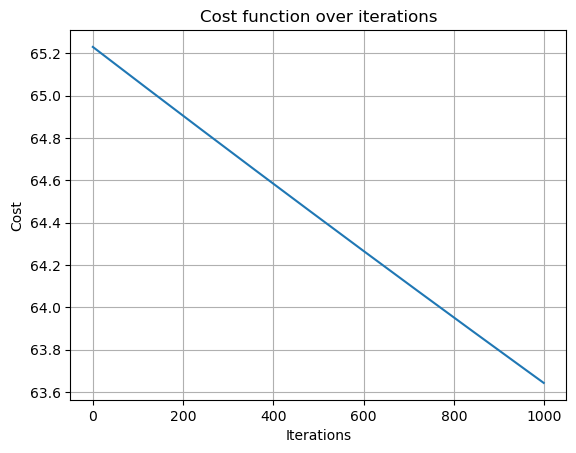

In [81]:
plt.plot(J_hist)
plt.title("Cost function over iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid()
plt.show()